In [1]:
import os
import sys 

os.environ["PYLIB"]=os.path.join(os.environ["SPARK_HOME"],'python','lib')
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'py4j-0.10.1-src.zip'))
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'pyspark.zip'))

import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config("spark.sql.warehouse.dir", "C:/Users/JSM")\
    .getOrCreate()

In [3]:
#경사하강법(전체 과정)

import numpy as np
x=np.array([1,2,3,4])
y=np.array([6,5,7,10])
#x=np.array([0.5,2.3,2.9])
#y=np.array([1.4,1.9,3.2])

x=np.array([x,np.ones(len(x))])  # w0 * x0 + w1 * x1
x=x.T
print x, x.shape

theta=np.array(np.ones([x.shape[1]])) #세타 -> 기울기(변화값)
print theta

def h(x,theta): #h(x)
    return np.dot(x,theta)

h(x,theta)

error=h(x,theta)-y
print np.sum(y-h(x,theta))*(-2)/len(x)
gradient=np.dot(x.T,error) #경사(초기값이라 오차 있을 수 밖에 없음)
print gradient

alpha=0.01 #학습률 : 지나치게 갱신되는 것을 막는다.
theta -= alpha*gradient
print theta 

#def gradientDescent(x, y, theta, alpha, m, numIterations):
alpha=0.01
numIterations=4000
theta=np.ones([x.shape[1]])
#theta=np.array([1,1])
for i in range(numIterations):
    h=np.dot(x,theta)
    error=h-y
    #gradient=[np.sum(y-h)*(-2), np.sum((y-h)*x)*(-2)]
    cost = np.sum((h-y)** 2) / (2 * len(x))
    gradient=np.dot(x.T,error) # w0, w1
    theta -= alpha*gradient
    if i%100 == 0:
        print "Iteration {0} | theta {1} Cost {2:.5f}".format(i, theta, cost)
#    return theta

[[1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]] (4L, 2L)
[1. 1.]
-7.0
[-37. -14.]
[1.37 1.14]
Iteration 0 | theta [1.37 1.14] Cost 6.75000
Iteration 100 | theta [1.79291203 2.34479071] Cost 0.63779
Iteration 200 | theta [1.61550957 2.86637557] Cost 0.55893
Iteration 300 | theta [1.51820553 3.15246131] Cost 0.53521
Iteration 400 | theta [1.46483493 3.3093774 ] Cost 0.52807
Iteration 500 | theta [1.43556152 3.3954448 ] Cost 0.52592
Iteration 600 | theta [1.41950525 3.44265218] Cost 0.52528
Iteration 700 | theta [1.4106985  3.46854511] Cost 0.52508
Iteration 800 | theta [1.40586805 3.48274721] Cost 0.52503
Iteration 900 | theta [1.40321859 3.49053696] Cost 0.52501
Iteration 1000 | theta [1.40176537 3.49480959] Cost 0.52500
Iteration 1100 | theta [1.4009683  3.49715309] Cost 0.52500
Iteration 1200 | theta [1.4005311  3.49843849] Cost 0.52500
Iteration 1300 | theta [1.40029131 3.49914352] Cost 0.52500
Iteration 1400 | theta [1.40015978 3.49953023] Cost 0.52500
Iteration 1500 | theta [1.40008764 3.4997

[19.18888889 19.90555556 20.62222222 21.33888889 22.05555556 22.77222222
 23.48888889 24.20555556 24.92222222]


C:\Users\JSM\Anaconda2\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


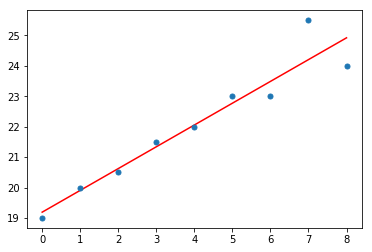

C:\Users\JSM\Anaconda2\lib\site-packages\ipykernel_launcher.py:40: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


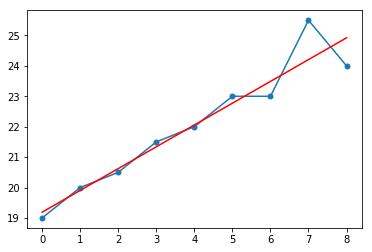

In [5]:
#회귀식 그래프 함수 with numpy
import numpy as np

x=np.arange(0,9)
y=[19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24]

A=np.array([x,np.ones(len(x))]) #상수도출 -> '1'행 추가

w=np.linalg.lstsq(A.T,y)[0] #넘파이 회귀식
fitted=w[0]*x+w[1]
print fitted #갱신된 값

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.plot(x,fitted,'r-',x,y,'o',markersize=5)
plt.show()

##진짜 함수
def drawRegress2d(x,y):
    """
    Parameters
    ----------
        arg1: list or array
        arg2: list or array
    Returns
    -------
        None
    Examples
    --------
        x=np.arange(0,9)
        y=[19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24] 
        drawRegress2d(x,y)
    """
    import matplotlib.pyplot as plt 
    import numpy as np
    A=np.array([x,np.ones(len(x))])
    w=np.linalg.lstsq(A.T,y)[0]
    fitted=w[0]*x+w[1]
    #plt.plot(x,y,'r-',xi,y,'o',markersize=5)
    plt.plot(x, y, 'o-', label='Original data', markersize=5)
    plt.plot(x, fitted, 'r', label='Fitted line') #원래값끼리도 연결
    plt.show()
    
%matplotlib inline

import numpy as np
x=np.arange(0,9)
y=[19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24] 
drawRegress2d(x,y)